# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classifictaion problems.

A classifictaion problem is where you try to classify something as one thin or another.

A few types of classification problems.
* Binary classifictaion
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1_000 examples
n_samples = 1_000

# Create circles
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42)

In [3]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is a little hard to understand right now... let's visualize it!

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


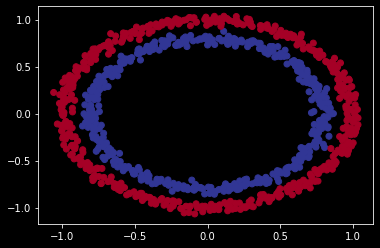

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

🛠️**Excercise:** Before pushing forward, spend 10 minutes playing around with (Tensorflow Playground)[https://playground.tensorflow.org/] building and running different neural networks. See what happens when you change different hyperparameters.

## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[17], y[17]

(array([ 0.1070617, -0.7930922]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak it
6. Evaluate ...

In [10]:
import tensorflow as tf
tf.__version__

'2.6.3'

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 3ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4830


In [12]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... It's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [13]:
# 1. Create the model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=200, verbose=0)

# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000


[0.6937825679779053, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [14]:
# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7020 - accuracy: 0.5100


[0.7020291686058044, 0.5099999904632568]

>🔑 **Note:** Whenever your model is performing strangely ot there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspectyour data, inspect your model, inspect your model's predictions.

To vizualize our model's prediction, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions accross the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
    '''
    Plots the decision boundary created by a model predicting X.
    '''
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

Doing binary classification


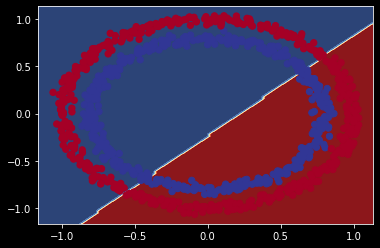

In [18]:
# Check out the predictions our model is making
plot_decision_boundary(
    model=model_3, 
    X=X, 
    y=y
)

In [19]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [20]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
y_reg_train = y_regression[:150]
X_reg_test = X_regression[150:]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
# model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=0) # This isn't working

Oh wait... we compiled our model for a binary classification problem.

But we're now working on a regression problem, let's change the model to suit our data. 

In [21]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)

# 4. Evaluate the model
model_3.evaluate(X_reg_test, y_reg_test)

2/2 [==============================] - 0s 4ms/step - loss: 60.5753 - mae: 60.5753


[60.575313568115234, 60.575313568115234]

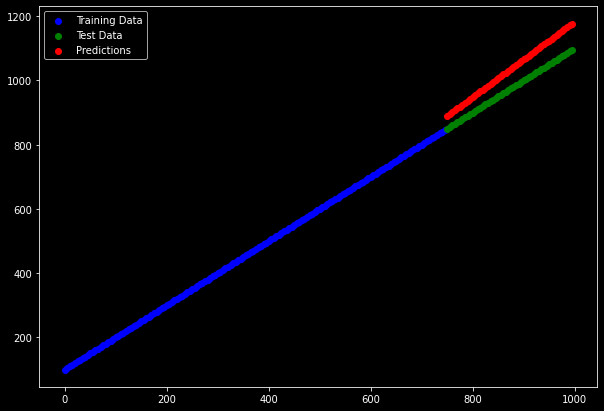

In [22]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the models predictions
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

## The missing piece: Non-linearity

In [23]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
history = model_4.fit(X, y, epochs=100, verbose=0)

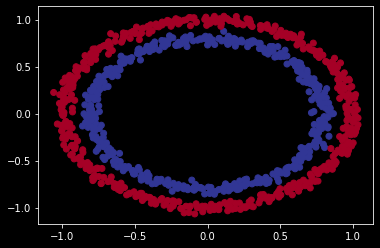

In [24]:
# Check out our data: visualize, visualize, visualize
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

Doing binary classification


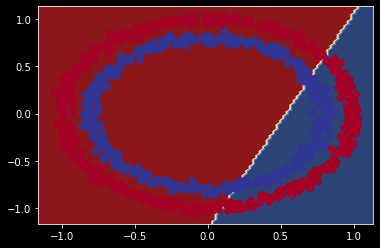

In [25]:
# Check the decision boundary for out latest model
plot_decision_boundary(
    model=model_4,
    X=X,
    y=y
)

Let's try build our first neural network with a non-linear activation function.

In [26]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation function
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

c:\Users\gutsc\anaconda3\envs\udemy_tensorflow\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9575 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8372 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7656 - accuracy: 0.4120
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7378 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6978 - accuracy: 0.4190
Epoch 11/

In [27]:
# Try to replicate the multi-layer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [28]:
# 4. Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Doing binary classification


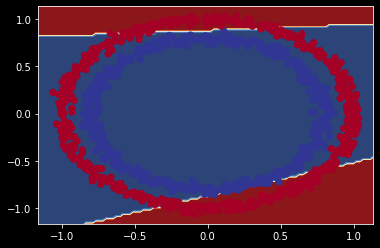

In [29]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [30]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

# 3. Fit the model
model_7.fit(X, y, epochs=500)

# 4. Evaluate the model
model_7.evaluate(X, y)

Epoch 1/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5160
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5390
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5510
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5480
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

[0.019338825717568398, 0.9959999918937683]

Doing binary classification


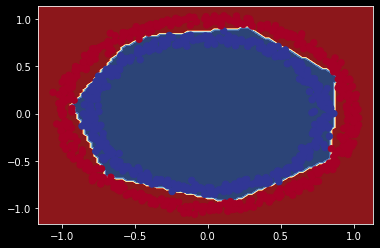

In [31]:
plot_decision_boundary(model_7, X, y)

🤔 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly? Hint: What data did the model learn on and what data did we predict on?

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action

In [32]:
# Create a toy tnesor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

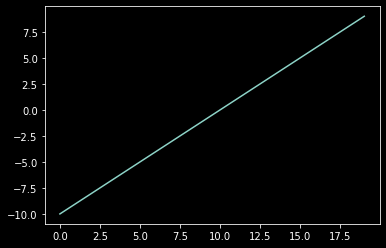

In [33]:
# Vizualize our toy tensor
plt.plot(A)

In [34]:
# Let's start by replicatin sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.math.exp(-x))

In [35]:
# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

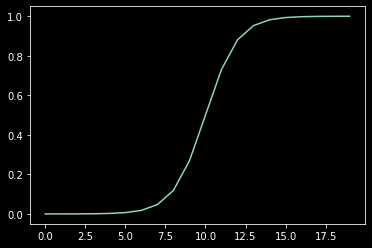

In [36]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [37]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(0, x)

In [38]:
# Pass the toy tensor to relu
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

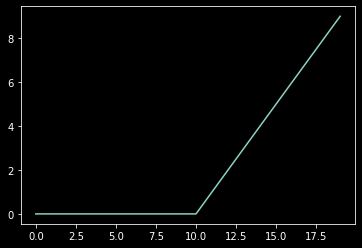

In [39]:
# Plot the toy tensor transformed by relu
plt.plot(relu(A))

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>,
 [<matplotlib.lines.Line2D at 0x248e5dc8970>])

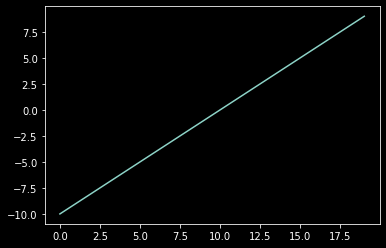

In [40]:
# Let's try the linear activation function
def linear(x):
    return x

linear(A), plt.plot(linear(A))

In [41]:
# Does A even change?
A == tf.keras.activations.linear(A), A == linear(A)

(<tf.Tensor: shape=(20,), dtype=bool, numpy=
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True])>,
 <tf.Tensor: shape=(20,), dtype=bool, numpy=
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True])>)

🔑 **Note:** Machine learning activation function cheat sheet
https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [42]:
# Check how many axamples we have
len(X)

1000

In [43]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [44]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.01), # default lr=0.001
    metrics=["accuracy"]
)

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

c:\Users\gutsc\anaconda3\envs\udemy_tensorflow\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.5850
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6412 - accuracy: 0.6762
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7475
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.7700
Epoch 11/25
25/25 [

In [45]:
# 4. Evaluate the model
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 0.9950


[0.12357813119888306, 0.9950000047683716]

Doing binary classification
Doing binary classification


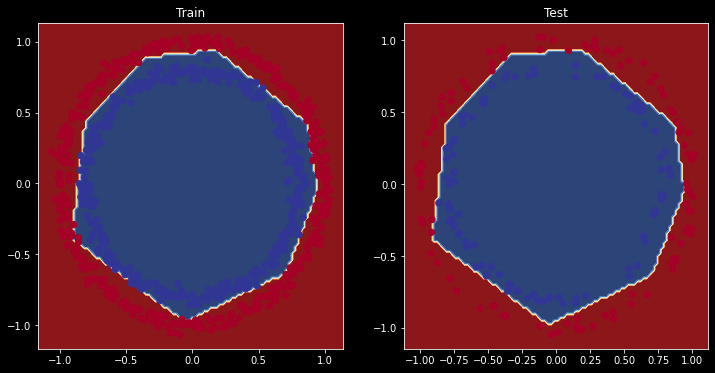

In [46]:
# Plot dicision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)

## Plot the loss (or training) curves

In [47]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.684653,0.54250
1,0.677723,0.55250
2,0.673597,0.55125
3,0.668157,0.57750
4,0.663266,0.58500
5,0.654546,0.58500
6,0.641162,0.67625
7,0.626282,0.70125
8,0.603821,0.74750
9,0.571554,0.77000


Text(0.5, 1.0, 'Model_8 loss curves')

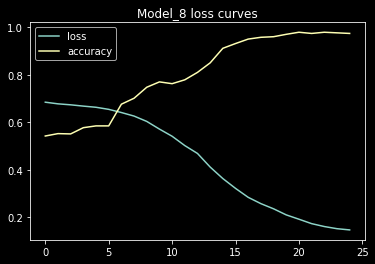

In [48]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate, where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionalty, you can add to your model *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [49]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model
history_9 = model_9.fit(
    X_train, 
    y_train, 
    epochs=100, 
    callbacks=[lr_scheduler]
)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

<AxesSubplot:xlabel='epochs'>

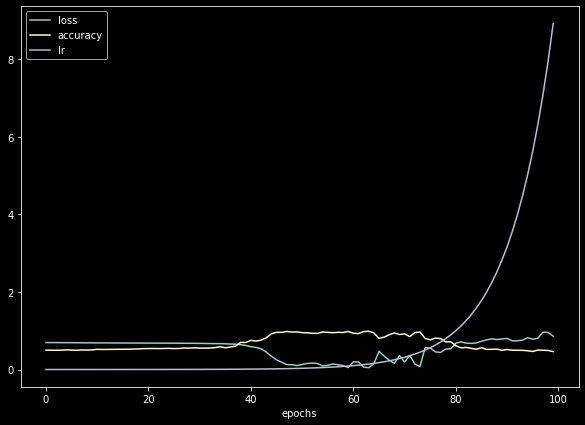

In [50]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. loss')

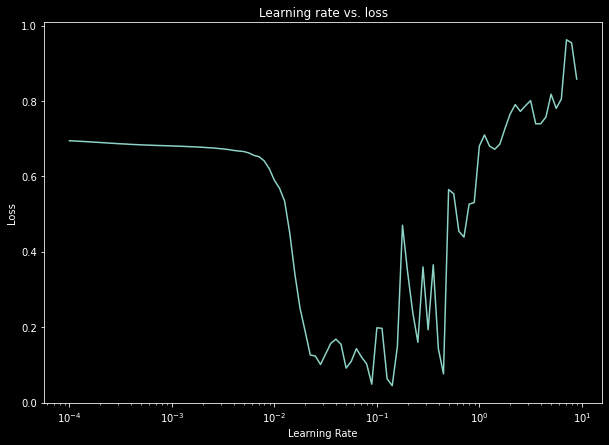

In [51]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))

plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

In [52]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [53]:
# Let's try using a higher *idel* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the *ideal* learning rate
model_10.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(lr=0.02),
    metrics=["accuracy"]
)

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

c:\Users\gutsc\anaconda3\envs\udemy_tensorflow\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6400
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.7538
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.8275
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.8462
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.9038
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2523 - accuracy: 0.9463
Epoch 11/20
25/25 [

In [54]:
# Evaluate model_10
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9900


[0.05797959491610527, 0.9900000095367432]

In [55]:
# Evaluate model_8
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 0.9950


[0.12357813119888306, 0.9950000047683716]

Doing binary classification
Doing binary classification


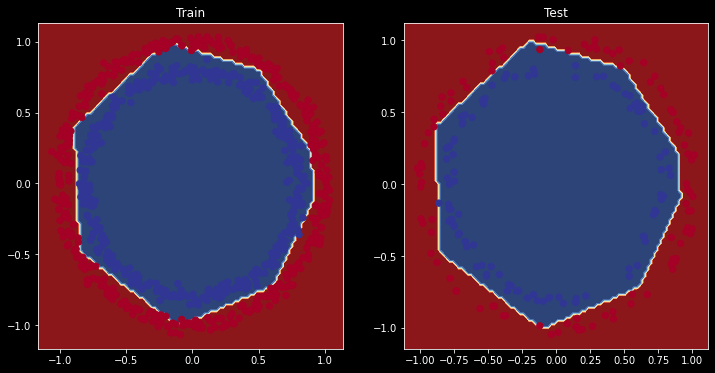

In [56]:
# Plot decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision - Higher Precision leads to less false positiv
* Recall - Higher Recall leads to less false negativ
* F1-Score - Combination of Precision and Recall
* Confusion matrix
* Classification report (from scikit-learn)

In [57]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9900
Model loss on the test set: 0.05797959491610527
Model accuracy on the test set: 99.00%


How about a confusion matrix?

In [58]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

>confusion_matrix(y_test, y_preds) 
leads to _ValueError: Classification metrics can't handle a mix of binary and continuous targets_

Ops... Looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [59]:
# Convert our predticiont probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [60]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]], dtype=int64)

How about we prettify our confusion matrix?

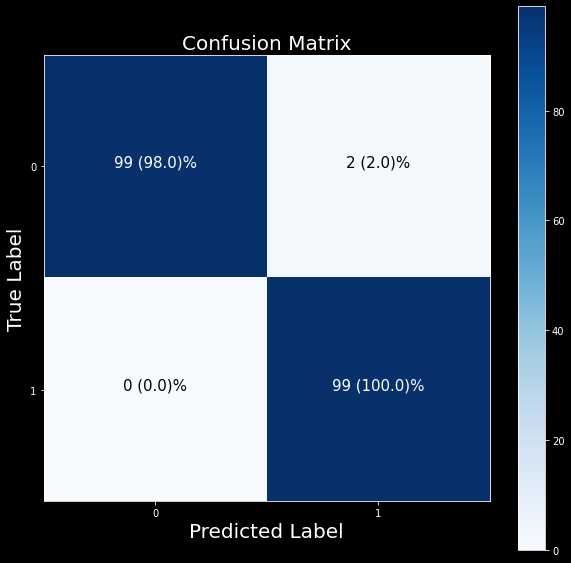

In [61]:
# Note: The confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://github.com/scikit-learn/scikit-learn/blob/80598905e/sklearn/metrics/_plot/confusion_matrix.py#L462
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html


import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axis
ax.set(
    title="Confusion Matrix",
    xlabel="Predicted Label",
    ylabel="True Label",
    xticks=np.arange(n_classes),
    yticks=np.arange(n_classes),
    xticklabels=labels,
    yticklabels=labels
)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j, i , f"{cm[i, j]} ({cm_norm[i, j]*100:.1f})%",
        horizontalalignment="center",
        color="white" if cm[i, j] > threshold else "black",
        size=15
    )

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification
* It also means if you have 100 different classes, it's multi-class classification

To practice multi-class classification, we're going to biuld a neural network to classify images of different items of clothing.

In [62]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
# https://github.com/zalandoresearch/fashion-mnist

# The data has already been sorten into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [63]:
# Show the first training example
print(f"Training sample:\{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:\[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [64]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

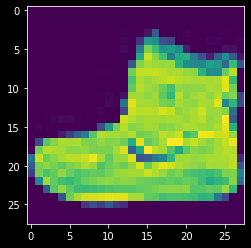

In [65]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [66]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-Shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
len(class_names)

10

Text(0.5, 1.0, 'Sandal')

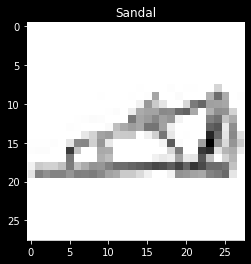

In [67]:
# Plot an example image and its label
index_of_choice = 17000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

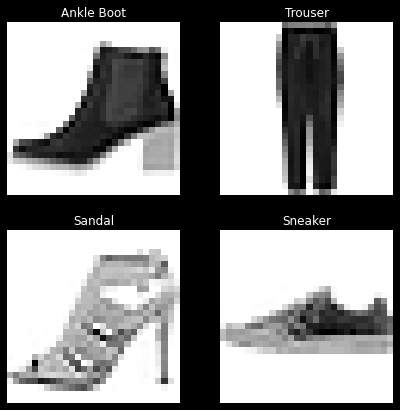

In [68]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multiclass classifictaion model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothin)
* Loss function = tf.keras.losses.CategoricalCrossentropy() (instead of binary)
    * If your labels are one-hot encoded, use CategoricalCrossentropy()
    * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [69]:
# Our data needs to be flattened (from 28 x 28 to 28*28=784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [70]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [71]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
non_norm_history = model_11.fit(
    train_data, 
    tf.one_hot(train_labels, depth=10), 
    epochs=10, 
    validation_data=(test_data, tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1208 - accuracy: 0.1688 - val_loss: 1.8335 - val_accuracy: 0.2357
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6966 - accuracy: 0.2561 - val_loss: 1.6541 - val_accuracy: 0.3076
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6312 - accuracy: 0.2869 - val_loss: 1.6080 - val_accuracy: 0.2916
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6043 - accuracy: 0.2955 - val_loss: 1.5983 - val_accuracy: 0.3111
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5920 - accuracy: 0.3078 - val_loss: 1.5735 - val_accuracy: 0.3294
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5836 - accuracy: 0.3188 - val_loss: 1.5664 - val_accuracy: 0.3295
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5761 - accuracy: 0.3239 - val_loss: 1.6295 - val_accuracy:

In [72]:
# Check the model summary
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_28 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [74]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / train_data.max()

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [75]:
# Set random seed
tf.random.set_seed(42)

# 1 Build model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2 Compile model
model_12.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3 Fit the model
norm_history = model_12.fit(
    train_data_norm,
    train_labels,
    # tf.one_hot(train_labels, depth=10),
    epochs=10,
    validation_data=(test_data_norm, test_labels) #tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0291 - accuracy: 0.6486 - val_loss: 0.6916 - val_accuracy: 0.7598
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6371 - accuracy: 0.7747 - val_loss: 0.6389 - val_accuracy: 0.7819
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5943 - accuracy: 0.7907 - val_loss: 0.6249 - val_accuracy: 0.7785
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5751 - accuracy: 0.7973 - val_loss: 0.6068 - val_accuracy: 0.7892
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8008 - val_loss: 0.6151 - val_accuracy: 0.7885
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8045 - val_loss: 0.5853 - val_accuracy: 0.7927
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5487 - accuracy: 0.8061 - val_loss: 0.6089 - val_accuracy:

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalzied (numbers betwenn 0 & 1)

<AxesSubplot:title={'center':'Normalized data'}>

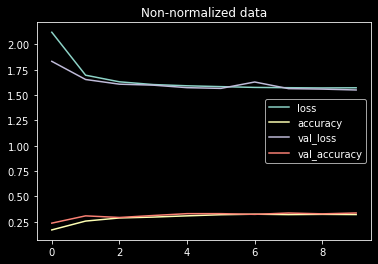

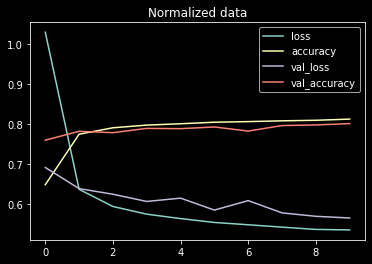

In [76]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different resutls. So when you're comparing models, it's important to make sure you're comparing them on the same cirteria (e.g. same architecture but different data or sama data but different architecture).

## Finding the ideal learning rate

In [77]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_13.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
# Slowly increase the learning rate every epoch by 10^(epoch/20), startin at 1e-3

# Fit the model
fit_lr_history = model_13.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0291 - accuracy: 0.6485 - val_loss: 0.6916 - val_accuracy: 0.7600
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6361 - accuracy: 0.7751 - val_loss: 0.6383 - val_accuracy: 0.7803
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5935 - accuracy: 0.7908 - val_loss: 0.6278 - val_accuracy: 0.7779
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7966 - val_loss: 0.6105 - val_accuracy: 0.7877
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5653 - accuracy: 0.7988 - val_loss: 0.6046 - val_accuracy: 0.7905
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8019 - val_loss: 0.5914 - val_accuracy: 0.7943
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5540 - accuracy: 0.8033 - val_loss: 0.5906 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

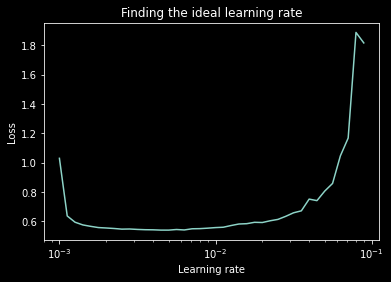

In [78]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, fit_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [79]:
# Let's refit the model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_14.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit model
history_14 = model_14.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0291 - accuracy: 0.6485 - val_loss: 0.6916 - val_accuracy: 0.7599
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6371 - accuracy: 0.7747 - val_loss: 0.6388 - val_accuracy: 0.7816
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5943 - accuracy: 0.7907 - val_loss: 0.6249 - val_accuracy: 0.7785
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5751 - accuracy: 0.7973 - val_loss: 0.6067 - val_accuracy: 0.7890
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8007 - val_loss: 0.6149 - val_accuracy: 0.7883
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8046 - val_loss: 0.5855 - val_accuracy: 0.7923
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5487 - accuracy: 0.8062 - val_loss: 0.6086 - val_accuracy:

## Evaluating our multi-class classification model
To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2 ...

In [80]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axis
    ax.set(
        title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
    )

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i , f"{cm[i, j]} ({cm_norm[i, j]*100:.1f})%",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size
        )

In [81]:
# Make some preditions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for prediction probabilities

# View the first 5 predictions
y_probs[:5]

array([[1.3150360e-10, 1.7359188e-12, 2.7445596e-05, 9.0668991e-08,
        5.9153954e-05, 1.0387870e-01, 9.4366825e-08, 8.3590560e-02,
        4.7383383e-03, 8.0770564e-01],
       [4.5290958e-06, 8.5671977e-16, 9.5759755e-01, 2.2013776e-07,
        1.5905844e-02, 1.5661241e-12, 2.5882630e-02, 6.8814192e-30,
        6.0918165e-04, 7.5095610e-09],
       [6.4776148e-05, 9.9678469e-01, 6.8602894e-08, 3.1119871e-03,
        2.4915811e-05, 2.7168317e-20, 1.3615992e-05, 2.9994840e-17,
        5.3712242e-08, 1.3284343e-12],
       [7.1801122e-05, 9.9133003e-01, 5.8638813e-07, 8.3247684e-03,
        2.3240612e-04, 1.9122075e-17, 3.9040831e-05, 1.3806285e-13,
        1.2934917e-06, 4.4877704e-10],
       [7.2815269e-02, 1.9524682e-06, 2.5359917e-01, 1.0581789e-02,
        4.4985168e-02, 3.2047013e-13, 6.1649615e-01, 4.2059500e-24,
        1.5205323e-03, 5.6959570e-10]], dtype=float32)

> 🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data)

In [82]:
y_probs[0], class_names, tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.3150360e-10, 1.7359188e-12, 2.7445596e-05, 9.0668991e-08,
        5.9153954e-05, 1.0387870e-01, 9.4366825e-08, 8.3590560e-02,
        4.7383383e-03, 8.0770564e-01], dtype=float32),
 ['T-Shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle Boot'],
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [83]:
# Convert all of the prediction probs into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[703,   7,  24,  87,  10,   3, 156,   0,  10,   0],
       [  2, 941,   3,  34,   8,   0,  12,   0,   0,   0],
       [ 18,   2, 653,  10, 190,   0, 110,   0,  16,   1],
       [ 39,  10,  10, 822,  54,   0,  47,   1,  17,   0],
       [  0,   0,  98,  23, 800,   0,  71,   0,   7,   1],
       [  0,   0,   1,   0,   0, 891,   0,  61,   8,  39],
       [111,   4, 157,  58, 160,   1, 492,   0,  17,   0],
       [  0,   0,   0,   0,   0,  29,   0, 937,   0,  34],
       [  4,   1,  38,  17,   9,  12,   9,   5, 902,   3],
       [  0,   0,   1,   0,   2,  14,   0,  50,   1, 932]], dtype=int64)

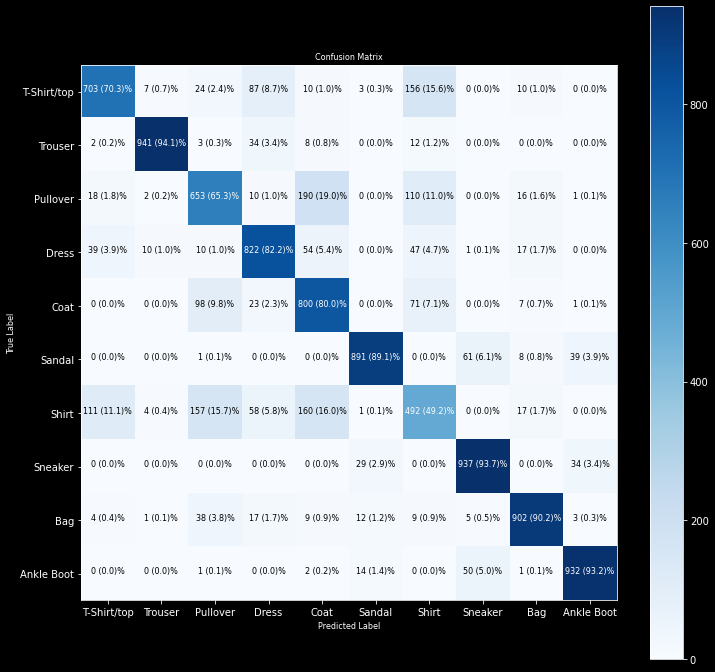

In [85]:
# Make a prettier confusion matrix
make_confusion_matrix(
    y_true=test_labels, 
    y_pred=y_preds, 
    classes=class_names, 
    figsize=(12,12), 
    text_size=8
)

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further unterstanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [93]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and truth label.
    """

    # Set up random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titels depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    
    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(
        pred_label, 
        100*tf.reduce_max(pred_probs),
        true_label),
        color=color)


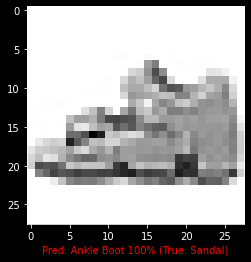

In [107]:
# Check out a random image as well as it's prediction
plot_random_image(
    model=model_14,
    images=test_data_norm, # always make predictions on the same kind of data your model was trained on
    true_labels=test_labels,
    classes=class_names)